# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "BreastCancer"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
# AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)

# Run Time

In [3]:
### Time ###
print("RF Time (minutes): " + "Mean: " + str(round(np.mean(RandomForesResults["Time_RF"])/60,2)) + "| Max: " + str(round(np.max(RandomForesResults["Time_RF"])/60,2)))
print("DUREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)))
print("UNREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)))
# print("DUREREAL 0.025 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2)))
# print("UNAL 0.025 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2)))

RF Time (minutes): Mean: 1.69| Max: 1.97
DUREAL 0.015 Time (minutes): Mean: 49.47| Max: 174.55
UNREAL 0.015 Time (minutes): Mean: 48.07| Max: 175.76


# Error Vec

(<Figure size 700x600 with 1 Axes>, <Figure size 700x600 with 1 Axes>)

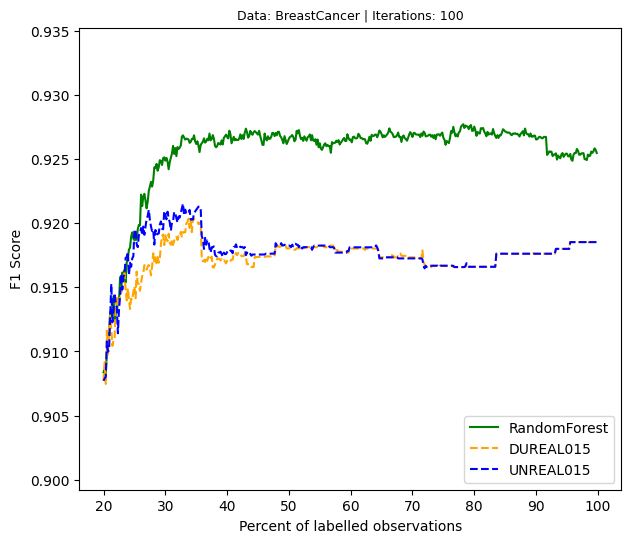

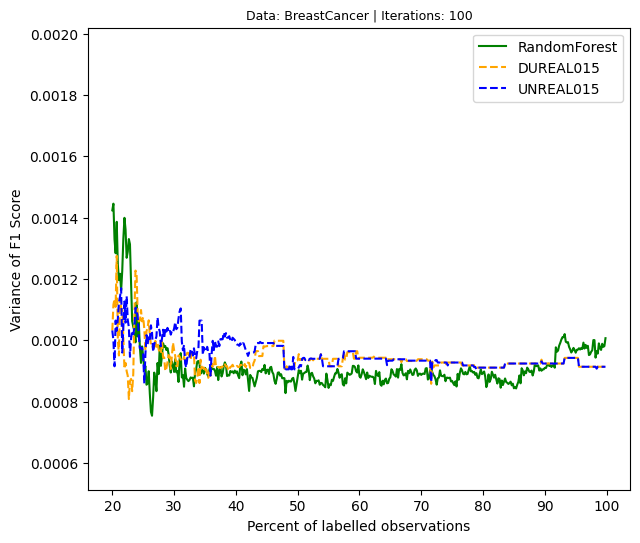

In [4]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL025": "orange",
    "UNREAL025": "blue"
}

linestyles = {
    "DUREAL015": "dashed",
    "UNREAL015": "dashed",
    "DUREAL025": "solid",
    "UNREAL025": "solid"
}

### Figure ##
MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                #  DUREAL025 = AnalyzedData025["Error_DUREAL"],
                #  UNREAL025 = AnalyzedData025["Error_UNREAL"],
                 Colors = colors,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 CriticalValue = 1.96)

# Selection History

In [5]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_DUREAL"], DataType = DataType)

In [6]:
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()

,AverageRank,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
299,8.710145,0,1,0,0,0,0,0,1,0,0,1
288,9.119403,0,1,0,0,1,0,0,0,0,1,1
455,9.677419,1,0,0,0,1,1,0,0,1,0,1
167,10.376812,1,0,0,0,0,0,1,0,1,0,1
668,11.816901,0,0,0,0,1,0,1,0,0,1,1


In [7]:
SelectionHistoryRank_UNREAL15.sort_values(by = "AverageRank").head()

,AverageRank,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
326,7.823529,1,1,0,1,1,1,0,1,0,0,1
299,9.521739,0,1,0,0,0,0,0,1,0,0,1
6,10.066667,0,1,0,1,1,1,0,1,1,0,0
288,10.313433,0,1,0,0,1,0,0,0,0,1,1
167,15.057971,1,0,0,0,0,0,1,0,1,0,1


In [8]:
SelectionHistoryRank_DUREAL15.sort_values(by = "AverageRank").head()

,AverageRank,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
326,7.308824,1,1,0,1,1,1,0,1,0,0,1
288,8.283582,0,1,0,0,1,0,0,0,0,1,1
6,9.100000,0,1,0,1,1,1,0,1,1,0,0
299,10.072464,0,1,0,0,0,0,0,1,0,0,1
590,10.142857,0,0,1,0,0,0,1,0,1,0,1


# Tree Counts

In [9]:
UNREAL_Average_TreeCountsRatio = np.mean(AnalyzedData015["TreeCounts_UNREAL"].div(AnalyzedData015["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatio = np.mean(AnalyzedData015["TreeCounts_DUREAL"].div(AnalyzedData015["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatio = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatio, 
                              DUREAL_Average_TreeCountsRatio,
                              np.round(UNREAL_Average_TreeCountsRatio - DUREAL_Average_TreeCountsRatio,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

(<Figure size 700x600 with 1 Axes>, <Figure size 700x600 with 1 Axes>)

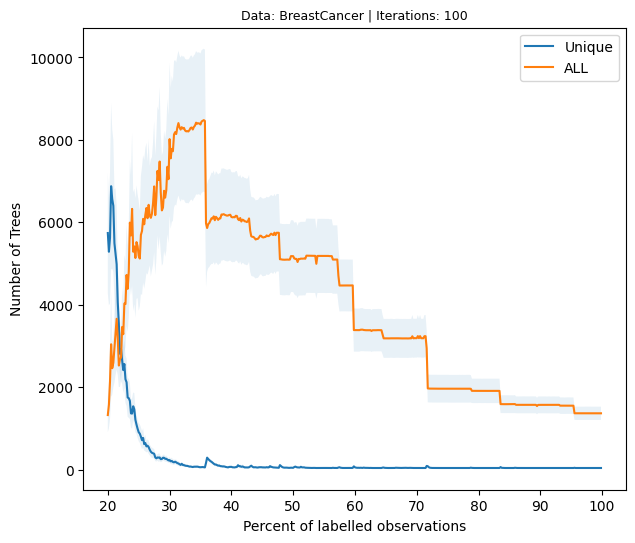

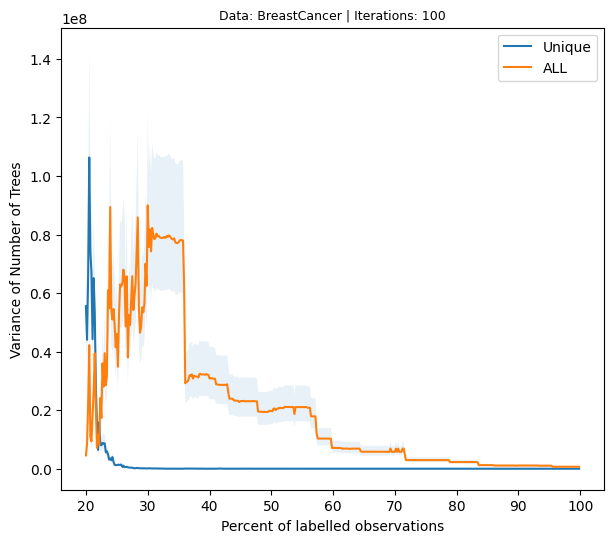

In [19]:
MeanVariancePlot(RelativeError = None,
                 Unique = 40*AnalyzedData015["TreeCounts_UNREAL"],
                 ALL = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                #  Ratio = AverageTreeCountRatio,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of Trees",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)